Markov Chains are examples of stochastic processes:


assume a sequence of random variables: ${X}_1, {X}_2, {X}_3, ...$ which evolves in time (as an example); so ${X}_n$ is the state of the system at time n (we are assuming we are in discrete time and space).

Markov property: What we are trying to answer here is that what is the probability for X to be at a specific state knowing all of its previus steps: 
\begin{equation*}
P({X}_n+1 = j|{X}_n = {i}_n, {X}_n-1 = {i}_n-1, {X}_n-2 = {i}_n-2, ... {X}_0 = {i}_0)
\end{equation*}

<font color='green'>Markov property let us find the probability of being at state $j$ in time $n+1$ only by knowing one previous step (at time $n$)</font>:
\begin{equation*}
P({X}_n+1 = j|{X}_n = {i}_n, {X}_n-1 = {i}_n-1, {X}_n-2 = {i}_n-2, ... {X}_0 = {i}_0) = P({X}_n+1 = j|{X}_n = {i}_n)
\end{equation*}
So we have a transition probability: $P({X}_n+1 = j|{X}_n = {i}_n) = {q}_{ij}$ which is the elements of transition matrix. 

Here, I make a small Markov chain example with 4 states:


<img src="MC_plot.png" alt="Drawing" style="width: 400px;"/>

Now, for this chain we need to write the transition probability matrix; so that all the connections between different states will be shown as elements of matrix. The summation of all elements in each row is 1. 

<img src="transition.png" alt="Drawing" style="width: 200px;"/>


Knowing the transition matrix we can answer questions such as where we stand after 10 steps. Suppose at time $n$ we are at ${X}_n$; and ${X}_n$ has distribution $\vec{S}$ which is a row vector which has the list of the probabilities to be at each state (exe: in the above figure there are 4 states). We want to see what happens at time $n+1$ so we want to find $P({X}_n+1 = j)$. In this case, it will be really helpful if we know $P({X}_n = i)$; so we condition $P({X}_{n+1} = j)$ to $P{X}_n = i$:

$P({X}_{n+1} = j) = \sum_i P({X}_{n+1} = j|{X}_n = i) P({X}_n = i) $

Where we already know that $ P({X}_n+1 = j|{X}_n = i)$ is the transition matrix and $P({X}_n = i)$ is the vector $\vec{S}$ so we can rewrite the above equation as: 
\begin{equation*}
P({X}_{n+1} = j) = \sum_i P({X}_{n+1} = j|{X}_n = i) P({X}_n = i) = \sum_i {S}_i {q}_{ij} = \vec{S} Q.
\end{equation*}

<font color='green'>We can see that at time $n+1$ we are at $\vec{S} Q$</font>.

What if we are at $n$ we want to calculate $P({X}_n+2 = j)$? 

Using the same logic we can write the following equation: 

\begin{equation*}
P({X}_{n+2} = j) = \sum_i P({X}_{n+2} = j|{X}_{n+1} = k, {X}_n = i) P({X}_{n+1} = k|{X}_n = i) = {q}_{ik} {q}_{kj} = Q^2
\end{equation*}


<font color='green'> We can conclude that $P({X}_{n+m} = j)$ is the $ij$th entry of $Q^m$ </font>.

<font color='green'> Next we want to see if we run the chain for long time will it converge to some limiting distribuition? Yes! under some conditions there exsists a unique stationary distribution. </font>

We introduce a stationary state $\vec S$ which is defined as: $\vec S Q = \vec S$

In [1]:
#here I am using the same transition matrix in the above text and I start with a state [1,0,0,0]. I am trying to see if 
# I get to a stationary state position
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
P = np.array([[1/2, 0.0,0.0, 1/2],
              [2/3, 0.0, 1/3, 0],
              [0.0, 0.0, 0.0, 1.0],
             [0.0, 2/3, 0.0, 1/3]])

state=np.array([[1.0, 0.0, 0.0, 0.0]])
state_history=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0]]
for x in range(150):
  state=np.dot(state,P)
  state_history=np.append(state_history,state,axis=0)
  
    
    


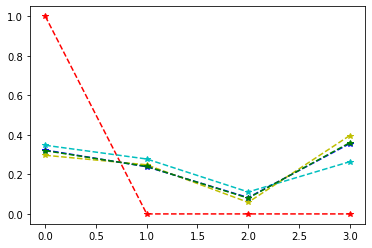

In [2]:
# it looks like that only after few iteration we are converging to a stationary state
plt.plot(state_history[0], 'r--*')
plt.plot(state_history[3], 'c--*')
plt.plot(state_history[5], 'y--*')
plt.plot(state_history[10], 'b--*')
plt.plot(state_history[40], 'g--*')

Here is the animation of it; after few iterations we clearly converge to the stationary state. I have uploaded the animation in the folder as well! 

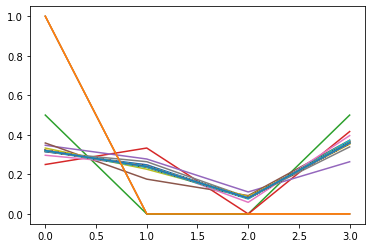

In [4]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    plt.plot(state_history[i])


    
ani = animation.FuncAnimation(fig, animate, interval=40) 
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=18)
ani.save("MC_stationary.mp4")
